In [2]:
#Tutorial (parts of it)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
%matplotlib inline

In [18]:
prob = .5
N = 1000
sims = 1000
position = np.zeros((N, sims))

for i in range(1, sims):
    
    for j in range(1, N):
        flip = np.random.rand()
    
        if flip < prob:
            dx = -1
        else:
            dx = 1
        
        position[i, j] = position[i, j - 1] + dx

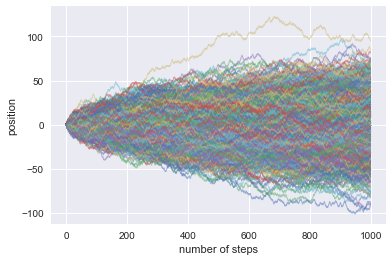

In [20]:
steps = np.arange(0, N, 1)
for i in range(sims):
    plt.plot(steps, position[i, :], linewidth=1, alpha=0.5)

plt.xlabel('number of steps')
plt.ylabel('position')

(-100, 100)

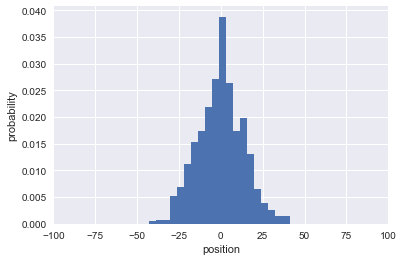

In [24]:
plt.hist(position[:, 199], bins=20, normed=True)
plt.xlabel('position')
plt.ylabel('probability')
plt.xlim([-100, 100])

In [275]:
#End of tutorial stuff

# Problem 1c

popSize = 16 #16 total flies...
numAlleles = 2 * popSize #...which implies 32 total alleles
numGen = 19 #simulating 19 generations
freq = 0.5 #starting frequency
numSims = 107 #number of simulations we are running

redFrequency = np.zeros((numSims, numGen))

for i in range(0, numSims):
    redFrequency[i,0] = freq
    
    for j in range(1, numGen):
        flips = np.random.rand(numAlleles)

        numRed = np.sum(flips < redFrequency[i, j - 1])
    
        new_freq = numRed / numAlleles
    
        redFrequency[i, j] = new_freq

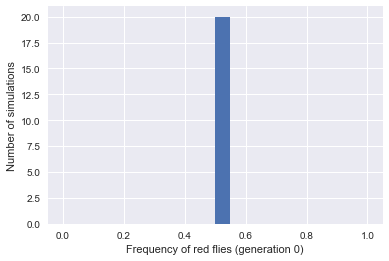

In [276]:
plt.hist(redFrequency[:, 0], bins=20, normed=True)
plt.xlabel('Frequency of red flies (generation 0)')
plt.ylabel('Number of simulations')

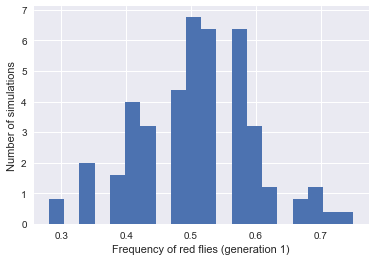

In [277]:
plt.hist(redFrequency[:, 1], bins=20, normed=True)
plt.xlabel('Frequency of red flies (generation 1)')
plt.ylabel('Number of simulations')

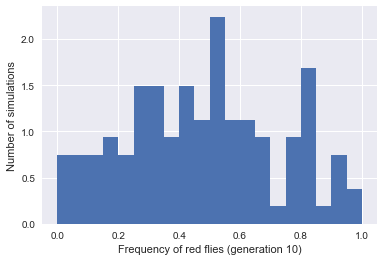

In [278]:
plt.hist(redFrequency[:, 10], bins=20, normed=True)
plt.xlabel('Frequency of red flies (generation 10)')
plt.ylabel('Number of simulations')

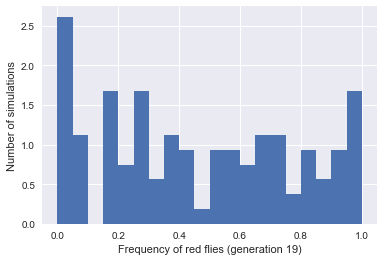

In [279]:
plt.hist(redFrequency[:, 18], bins=20, normed=True)
plt.xlabel('Frequency of red flies (generation 19)')
plt.ylabel('Number of simulations')

In [280]:
#Problem 1d

def findFixTime(popSize):
    numAlleles = 2 * popSize 
    numGen = 1000 #simulating 1000 generations
    freq = 0.5 #starting frequency
    numSims = 107 #number of simulations we are running

    redFrequency = np.zeros((numSims, numGen))
    
    total = 0
    for i in range(0, numSims):
        redFrequency[i,0] = freq
        for j in range(1, numGen):
            flips = np.random.rand(numAlleles)
            numRed = np.sum(flips < redFrequency[i, j - 1])
            new_freq = numRed / numAlleles
            redFrequency[i, j] = new_freq
            if(new_freq == 0 or new_freq == 1):
                total += j
                break
                
    return (total / numSims)
            

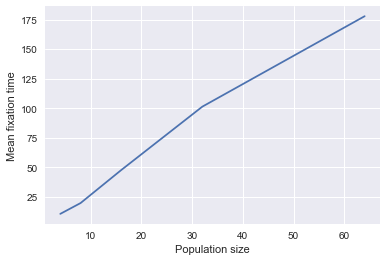

In [281]:
NSteps = np.zeros(5)
NVals = np.zeros(5)

for i in range(0,5):
    NSteps[i] = 4 * 2 ** i
    NVals[i] = findFixTime(int(NSteps[i]))

plt.plot(NSteps, NVals)

plt.xlabel('Population size')
plt.ylabel('Mean fixation time')

#Basically, what we can see from this plot is that mean fixation time scales linearly with population size, and that as
#population size increases, mean fixation time increases as well. This implies that genetic drift becomes more powerful
#in smaller populations than in larger ones, as for the smaller populations one allele can become extinct fairly quickly,
#whereas in larger populations it takes longer to become extinct. 

In [303]:
# Problem 1e

popSize = 16 #16 total flies...
numAlleles = 2 * popSize #...which implies 32 total alleles
numGen = 1000 #simulating 1000 generations
freq = 0.5 #starting frequency
mu = .001 #mutation frequency

redFrequency = np.zeros(numGen)
redFrequency[0] = freq
for i in range(1, numGen):
    flips = np.random.rand(numAlleles)
    numRed = np.sum(flips < redFrequency[i - 1])
    flips2 = np.random.rand(numRed)
    flips3 = np.random.rand(numAlleles - numRed)
    numOut = np.sum(flips2 < mu)
    numIn = np.sum(flips3 < mu)
    numRed = numRed - numOut + numIn
    new_freq = numRed / numAlleles
    redFrequency[i] = new_freq

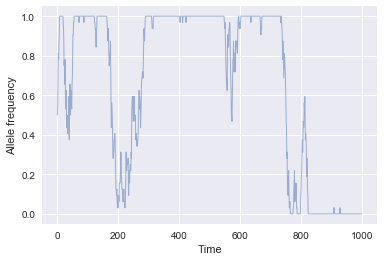

In [304]:
steps = np.arange(0, numGen, 1)
plt.plot(steps, redFrequency, linewidth=1, alpha=0.5)
plt.xlabel('Time')
plt.ylabel('Allele frequency')
#We see significant differences here as opposed to the model without mutations, as now "fixation" at either f == 0 or
#f == 1 is no longer fixed. The mutations allow a way for the frequencies to move away from f == 0 and f == 1 once they
#get there, and even move to the other "fixed" frequency, which is what occurs in this graph.

In [284]:
# Problem 1f

popSize = 16 #16 total flies...
numAlleles = 2 * popSize #...which implies 32 total alleles
numGen = 1000 #simulating 1000 generations
freq = 0.5 #starting frequency
numSims = 100 #100 simulations
mu = .001 #mutation frequency

redFrequency = np.zeros((numSims, numGen))
for i in range(0, numSims):
    redFrequency[i, 0] = freq
    for j in range(1, numGen):
        flips = np.random.rand(numAlleles)
        numRed = np.sum(flips < redFrequency[i, j - 1])
        flips2 = np.random.rand(numRed)
        flips3 = np.random.rand(numAlleles - numRed)
        numOut = np.sum(flips2 < mu)
        numIn = np.sum(flips3 < mu)
        numRed = numRed - numOut + numIn
        new_freq = numRed / numAlleles
        redFrequency[i, j] = new_freq

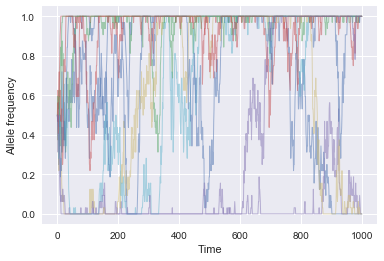

In [285]:
steps = np.arange(0, numGen, 1)

for i in range(10):
    plt.plot(steps, redFrequency[i], linewidth=1, alpha=0.5)
    plt.xlabel('Time')
    plt.ylabel('Allele frequency')

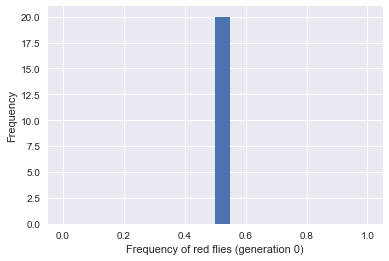

In [286]:
plt.hist(redFrequency[:, 0], bins=20, normed=True)
plt.xlabel('Frequency of red flies (generation 0)')
plt.ylabel('Frequency')

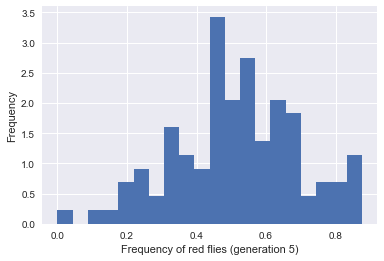

In [287]:
plt.hist(redFrequency[:, 5], bins=20, normed=True)
plt.xlabel('Frequency of red flies (generation 5)')
plt.ylabel('Frequency')

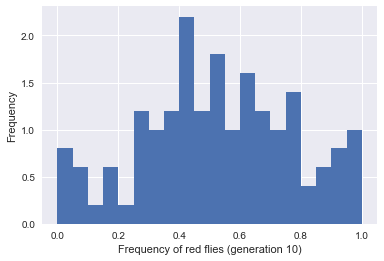

In [288]:
plt.hist(redFrequency[:, 10], bins=20, normed=True)
plt.xlabel('Frequency of red flies (generation 10)')
plt.ylabel('Frequency')

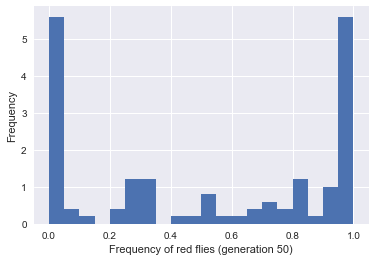

In [289]:
plt.hist(redFrequency[:, 50], bins=20, normed=True)
plt.xlabel('Frequency of red flies (generation 50)')
plt.ylabel('Frequency')

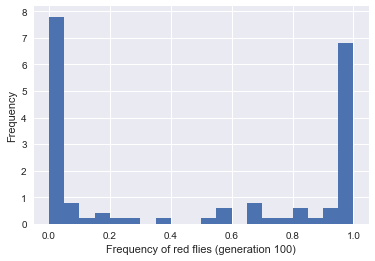

In [290]:
plt.hist(redFrequency[:, 100], bins=20, normed=True)
plt.xlabel('Frequency of red flies (generation 100)')
plt.ylabel('Frequency')

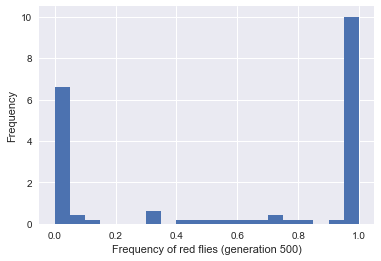

In [291]:
plt.hist(redFrequency[:, 500], bins=20, normed=True)
plt.xlabel('Frequency of red flies (generation 500)')
plt.ylabel('Frequency')

In [292]:
#Overall, the largest difference that we observe in the mutation model (compared to the null model) is that at large
#times (t = 100, t = 500, etc.) there is still an observable amount of simulations with allele frequencies that are not
#f == 0 or f == 1. Because of the mutations, the frequency of each fly can (unlike the null model) move away from the 
#"fixed" frequencies of f == 0 and f == 1, and therefore we observe frequencies other than these two at large times.

In [293]:
# Problem 1g

def muSim(mu):
    popSize = 16 #16 total flies...
    numAlleles = 2 * popSize #...which implies 32 total alleles
    numGen = 1000 #simulating 1000 generations
    freq = 0.5 #starting frequency
    numSims = 100 #100 simulations
    #mu = .001 #mutation frequency

    redFrequency = np.zeros((numSims, numGen))
    for i in range(0, numSims):
        redFrequency[i, 0] = freq
        for j in range(1, numGen):
            flips = np.random.rand(numAlleles)
            numRed = np.sum(flips < redFrequency[i, j - 1])
            flips2 = np.random.rand(numRed)
            flips3 = np.random.rand(numAlleles - numRed)
            numOut = np.sum(flips2 < mu)
            numIn = np.sum(flips3 < mu)
            numRed = numRed - numOut + numIn
            new_freq = numRed / numAlleles
            redFrequency[i, j] = new_freq
    return redFrequency

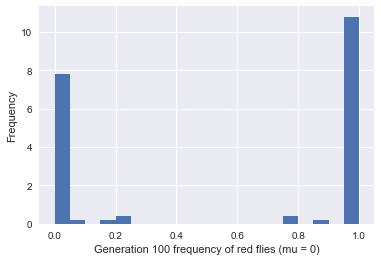

In [294]:
freq = muSim(0)
plt.hist(freq[:, 100], bins=20, normed=True)
plt.xlabel('Generation 100 frequency of red flies (mu = 0)')
plt.ylabel('Frequency')

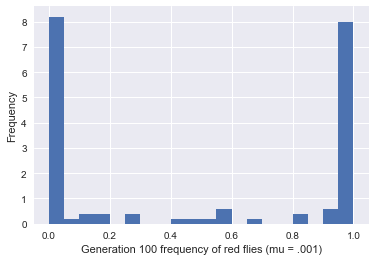

In [251]:
freq = muSim(.001)
plt.hist(freq[:, 100], bins=20, normed=True)
plt.xlabel('Generation 100 frequency of red flies (mu = .001)')
plt.ylabel('Frequency')

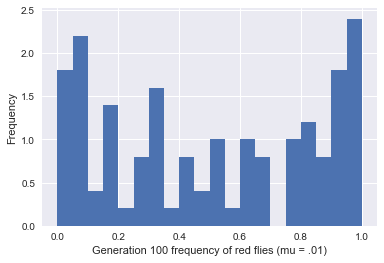

In [252]:
freq = muSim(.01)
plt.hist(freq[:, 100], bins=20, normed=True)
plt.xlabel('Generation 100 frequency of red flies (mu = .01)')
plt.ylabel('Frequency')

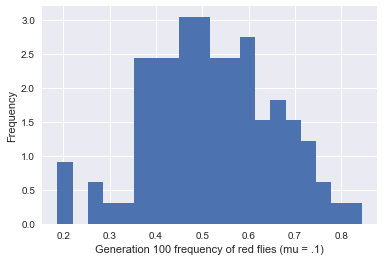

In [253]:
freq = muSim(.1)
plt.hist(freq[:, 100], bins=20, normed=True)
plt.xlabel('Generation 100 frequency of red flies (mu = .1)')
plt.ylabel('Frequency')

In [224]:
#As we can see from looking at these histograms, the larger the mu constant, the more deviation we see from the f == 0/
#f == 1 behavior of the null model. In the case where mu = 0, we see almost all of the data clustered near f == 0 and 
#f == 1. However, at larger values of mu (like mu = .1), we see so many mutations that the so-called "fixed" frequencies
#are not even very common at all.

In [227]:
#Problem 2c
e = 2.718281828459045
def p(t, nRatio, m1, s):
    return 1 / (1 + nRatio * e ** ( - m1 * s * t))

In [312]:
numHours = 24 * 365 * 100
time = np.zeros(numHours)
freqP = np.zeros(numHours)
freqQ = np.zeros(numHours)
for i in range(numHours):
    freqP[i] = p(i, (10 ** 9) - 1, .69314, 10 ** -4)
    freqQ[i] = 1 - freqP[i]
    time[i] = i / (365 * 24)
    

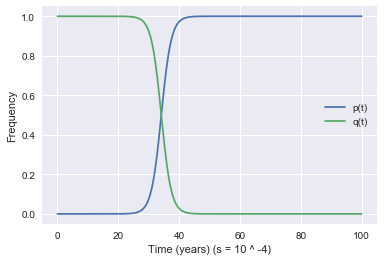

In [313]:
plt.plot(time, freqP,'-', label='p(t)')
plt.xlabel('Time (years)')
plt.ylabel('Frequency')
plt.plot(time, freqQ,'-', label='q(t)')
plt.xlabel('Time (years) (s = 10 ^ -4)')
plt.ylabel('Frequency')
plt.legend()

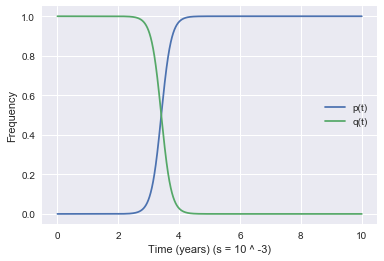

In [316]:
numHours = 24 * 365 * 10
time = np.zeros(numHours)
freqP = np.zeros(numHours)
freqQ = np.zeros(numHours)
for i in range(numHours):
    freqP[i] = p(i, (10 ** 9) - 1, .69314, 10 ** -3) #ln(2) = .69314 (m_1 obtained solving for 1 hr. doubling time)
    freqQ[i] = 1 - freqP[i]
    time[i] = i / (365 * 24)

plt.plot(time, freqP,'-', label='p(t)')
plt.xlabel('Time (years)')
plt.ylabel('Frequency')
plt.plot(time, freqQ,'-', label='q(t)')
plt.xlabel('Time (years) (s = 10 ^ -3)')
plt.ylabel('Frequency')
plt.legend()

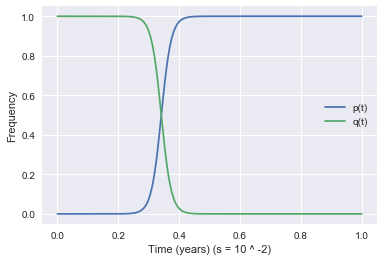

In [317]:
numHours = 24 * 365 * 1
time = np.zeros(numHours)
freqP = np.zeros(numHours)
freqQ = np.zeros(numHours)
for i in range(numHours):
    freqP[i] = p(i, (10 ** 9) - 1, .69314, 10 ** -2)
    freqQ[i] = 1 - freqP[i]
    time[i] = i / (365 * 24)

plt.plot(time, freqP,'-', label='p(t)')
plt.xlabel('Time (years)')
plt.ylabel('Frequency')
plt.plot(time, freqQ,'-', label='q(t)')
plt.xlabel('Time (years) (s = 10 ^ -2)')
plt.ylabel('Frequency')
plt.legend()